# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha uma para o este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [26]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn import linear_model

import numpy as np

In [27]:
X, y = load_boston(return_X_y=True)

Xpca = PCA(n_components=1).fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, random_state = 10)
Ridge_reg = linear_model.Ridge().fit(X_train, y_train)
Lasso_reg = linear_model.Lasso().fit(X_train, y_train)
TSR_reg = linear_model.TheilSenRegressor().fit(X_train, y_train)

In [29]:
y_pred_Ridge = Ridge_reg.predict(X_test)
y_pred_Lasso = Lasso_reg.predict(X_test)
y_pred_TSR = TSR_reg.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)
r2_Ridge = r2_score(y_test, y_pred_Ridge)

mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
r2_Lasso = r2_score(y_test, y_pred_Lasso)

mse_TSR = mean_squared_error(y_test, y_pred_TSR)
r2_TSR = r2_score(y_test, y_pred_TSR)

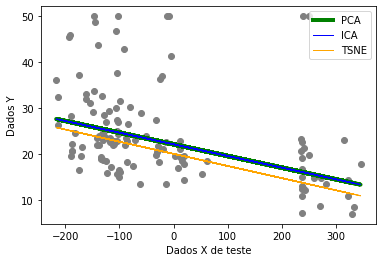

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred_Ridge, color='green', linewidth=4)
plt.plot(X_test, y_pred_Lasso, color='blue', linewidth=1)
plt.plot(X_test, y_pred_TSR, color='orange', linewidth=1)

plt.legend(['PCA', 'ICA', 'TSNE'], loc=1)

plt.ylabel('Dados Y')
plt.xlabel('Dados X de teste')

plt.show()